## **UCI Credit Card Approval**

#### **Introduction**

The  decision  of  approving  a  credit  card  or  loan  is  majorly dependent  on  the  personal  and  financial  background  of  the applicant.  Precisely,  age,  gender,  income,  employment  status, credit  history  and  other  attributes  contributes  to  the  approval decision. 

Credit Analysis involves the statistical – quantitative and qualitative measure to investigate the probability of a third party to pay  back the  loan to  the  bank on  time  and  predict  its  default characteristic.  Analysis  focus  on  recognizing,  assessing  and reducing the financial/other risks involved which may otherwise results in the losses incurred by the company while lending. The risk can be business loss by not approving the good candidate or can be financial loss by approving the candidate who is at bad risk. 

It is very important to manage credit risk and  handle challenges efficiently  for  credit decision  as it  can have  adverse effects on credit  management. Therefore,  evaluation  of credit  approval  is significant before jumping to any granting decision. 

Dataset: [Kaggle](https://www.kaggle.com/echo9k/uci-credit-approval-data-set)

#### **Objectives**
This analysis demonstrates several analytic techniques to examine one company’s decision to approve or deny credit card applications. The final model created out of this analysis is a combination of a logarithmic regression model and classification and regression tree (CART) model. 

The techniques include data visualization, association rules, logistical regression, and decision trees. This analysis is organized as follows:

- Generate several data visualizations to understand the underlying data;
- Perform data transformations as needed;
- Develop research questions about the data; and
- Generate and apply the model to answer the research questions.

#### **Metrics**

- AUC
- Accurracy Score

#### **Methodology**
We used CRISP-M Methodology
- Business understanding
-Data understanding
-Data preparation
-Modeling
-Evaluation
-Deployment

#### **Load Dataset**

In [0]:
data <- read.csv("/content/uci_credit.csv")
head(data)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>
1,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
2,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
3,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
4,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
5,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
6,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


#### **Explore the dataset**

In [0]:
# Dimensions of the dataset
dim(data)

[1] 690  16



> Our Dataset has 690 rows and 16 columns



In [0]:
# Column names
names(data)

[1] "A1"  "A2"  "A3"  "A4"  "A5"  "A6"  "A7"  "A8"  "A9"  "A10" "A11" "A12"
[13] "A13" "A14" "A15" "A16"

- The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. 
- The features of this dataset have been anonymized to protect the privacy, but this [article](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives us a pretty good overview of the probable features. 

- The probable features in a typical credit card application are **Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income** and finally the **ApprovalStatus**. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.

In [0]:
# Structure of the dataset
str(data)

'data.frame':	690 obs. of  16 variables:
 $ A1 : Factor w/ 3 levels "?","a","b": 3 2 2 3 3 3 3 2 3 3 ...
 $ A2 : Factor w/ 350 levels "?","13.75","15.17",..: 158 330 91 127 45 170 181 76 312 257 ...
 $ A3 : num  0 4.46 0.5 1.54 5.62 ...
 $ A4 : Factor w/ 4 levels "?","l","u","y": 3 3 3 3 3 3 3 3 4 4 ...
 $ A5 : Factor w/ 4 levels "?","g","gg","p": 2 2 2 2 2 2 2 2 4 4 ...
 $ A6 : Factor w/ 15 levels "?","aa","c","cc",..: 14 12 12 14 14 11 13 4 10 14 ...
 $ A7 : Factor w/ 10 levels "?","bb","dd",..: 9 5 5 9 9 9 5 9 5 9 ...
 $ A8 : num  1.25 3.04 1.5 3.75 1.71 ...
 $ A9 : Factor w/ 2 levels "f","t": 2 2 2 2 2 2 2 2 2 2 ...
 $ A10: Factor w/ 2 levels "f","t": 2 2 1 2 1 1 1 1 1 1 ...
 $ A11: int  1 6 0 5 0 0 0 0 0 0 ...
 $ A12: Factor w/ 2 levels "f","t": 1 1 1 2 1 2 2 1 1 2 ...
 $ A13: Factor w/ 3 levels "g","p","s": 1 1 1 1 3 1 1 1 1 1 ...
 $ A14: Factor w/ 171 levels "?","00000","00017",..: 70 13 98 33 39 117 56 25 64 17 ...
 $ A15: int  0 560 824 3 0 0 31285 1349 314 1442 ...
 $ A16: Fa


**Observations**
- We see 690 observations representing 690 individuals, and 16 variables named A1 – A16. The first 15 variables represent various attributes of the individuals submitting the application and the 16th variable contains the outcome of the application, either positive (represented by “+”) meaning granted
or negative (represented by "-") meaning rejected.
       -TO BE CHECKED FOR DATA CLEANING.
- We also note that most datatypes of the variables are not correct and thus we will need to change them
- Data variables should have known column names
- Some variables have ? values


#### **Data Cleaning**

##### Handling unknown ? values

In [0]:
# We reload the data with the ? as nulls.
new_df1 = read.csv("/content/uci_credit.csv", na = "?")

# Checking if the ?s have been removed.
str(new_df1)


'data.frame':	690 obs. of  16 variables:
 $ A1 : Factor w/ 2 levels "a","b": 2 1 1 2 2 2 2 1 2 2 ...
 $ A2 : num  30.8 58.7 24.5 27.8 20.2 ...
 $ A3 : num  0 4.46 0.5 1.54 5.62 ...
 $ A4 : Factor w/ 3 levels "l","u","y": 2 2 2 2 2 2 2 2 3 3 ...
 $ A5 : Factor w/ 3 levels "g","gg","p": 1 1 1 1 1 1 1 1 3 3 ...
 $ A6 : Factor w/ 14 levels "aa","c","cc",..: 13 11 11 13 13 10 12 3 9 13 ...
 $ A7 : Factor w/ 9 levels "bb","dd","ff",..: 8 4 4 8 8 8 4 8 4 8 ...
 $ A8 : num  1.25 3.04 1.5 3.75 1.71 ...
 $ A9 : Factor w/ 2 levels "f","t": 2 2 2 2 2 2 2 2 2 2 ...
 $ A10: Factor w/ 2 levels "f","t": 2 2 1 2 1 1 1 1 1 1 ...
 $ A11: int  1 6 0 5 0 0 0 0 0 0 ...
 $ A12: Factor w/ 2 levels "f","t": 1 1 1 2 1 2 2 1 1 2 ...
 $ A13: Factor w/ 3 levels "g","p","s": 1 1 1 1 3 1 1 1 1 1 ...
 $ A14: int  202 43 280 100 120 360 164 80 180 52 ...
 $ A15: int  0 560 824 3 0 0 31285 1349 314 1442 ...
 $ A16: Factor w/ 2 levels "-","+": 2 2 2 2 2 2 2 2 2 2 ...


##### Changing column names

In [0]:
# Change column names
# The column names in the data set are encoded, but the real names are:

# "Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed",
# "CreditScore", "DriversLicense",  "Citizen", "ZipCode", "Income", "Approved") 

names(new_df1)[names(new_df1) == "A1"] <- "Gender"
names(new_df1)[names(new_df1) == "A2"] <- "Age"
names(new_df1)[names(new_df1) == "A3"] <- "Debt"
names(new_df1)[names(new_df1) == "A4"] <- "Married"
names(new_df1)[names(new_df1) == "A5"] <- "BankCustomer"
names(new_df1)[names(new_df1) == "A6"] <- "EducationLevel"
names(new_df1)[names(new_df1) == "A7"] <- "Ethnicity"
names(new_df1)[names(new_df1) == "A8"] <- "YearsEmployed"
names(new_df1)[names(new_df1) == "A9"] <- "PriorDefault"
names(new_df1)[names(new_df1) == "A10"] <- "Employed"
names(new_df1)[names(new_df1) == "A11"] <- "CreditScore"
names(new_df1)[names(new_df1) == "A12"] <- "DriversLicense"
names(new_df1)[names(new_df1) == "A13"] <- "Citizen"
names(new_df1)[names(new_df1) == "A14"] <- "ZipCode"
names(new_df1)[names(new_df1) == "A15"] <- "Income"
names(new_df1)[names(new_df1) == "A16"] <- "Approved"
names(new_df1)
head(new_df1)

[1] "Gender"         "Age"            "Debt"           "Married"       
 [5] "BankCustomer"   "EducationLevel" "Ethnicity"      "YearsEmployed" 
 [9] "PriorDefault"   "Employed"       "CreditScore"    "DriversLicense"
[13] "Citizen"        "ZipCode"        "Income"         "Approved"

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>
1,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
2,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
3,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
4,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
5,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
6,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,+


- All column names have been changed

##### Handling missing values

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘data.table’, ‘gridExtra’, ‘networkD3’




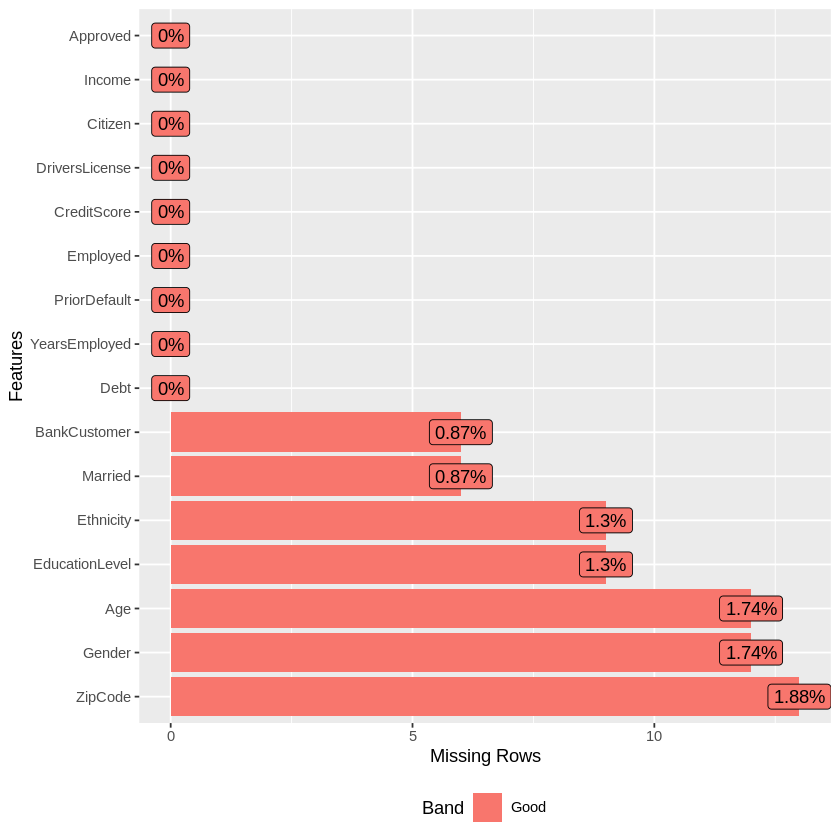

In [0]:
# Checking for missing values.
# Installing library
install.packages("DataExplorer")

library(DataExplorer)
plot_missing(new_df1)

In [0]:
# Checking the number of null values per column
colSums(is.na(new_df1))

Gender            Age           Debt        Married   BankCustomer 
            12             12              0              6              6 
EducationLevel      Ethnicity  YearsEmployed   PriorDefault       Employed 
             9              9              0              0              0 
   CreditScore DriversLicense        Citizen        ZipCode         Income 
             0              0              0             13              0 
      Approved 
             0

- Age has 12 missing values
- Bank customer has 6 missing values
- educational level also has 6 missing values
- Ethinicity 9
- Years employed 9


In [0]:
# Previewing the rows that have missing values.

new_df1[rowSums(is.na(new_df1)) > 0,]

dim(new_df1[rowSums(is.na(new_df1)) > 0,])

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>
72,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NA,0,-
84,a,NA,3.500,u,g,d,v,3.000,t,f,0,t,g,300,0,-
87,b,NA,0.375,u,g,d,v,0.875,t,f,0,t,s,928,0,-
93,b,NA,5.000,y,p,aa,v,8.500,t,f,0,f,g,0,0,-
98,b,NA,0.500,u,g,c,bb,0.835,t,f,0,t,s,320,0,-
203,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NA,600,+
207,a,71.58,0.000,NA,NA,NA,NA,0.000,f,f,0,f,p,NA,0,+
244,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,NA,26726,+
249,NA,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73,444,+


[1] 37 16

- 37 rows have missing values. If they were to be dropped we would lose less than 5% of our data.
- This would not affect the data significantly

[1] 653  16

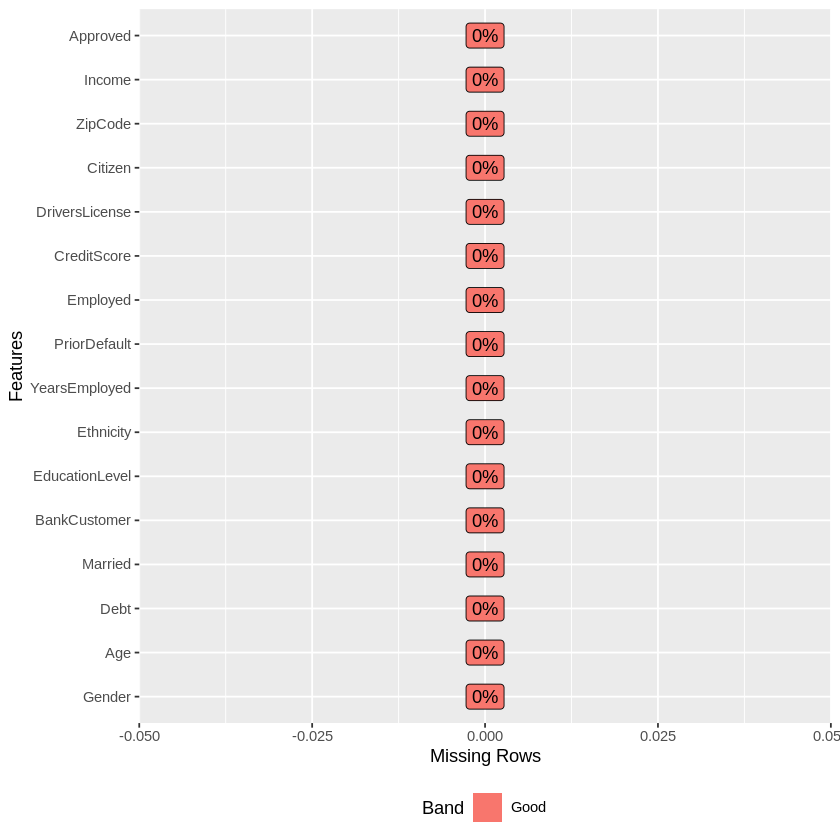

In [0]:
# Dropping null values.
data = na.omit(new_df1) 

# Viusalizing any null values.
plot_missing(data)

# Checking the new data dimension
dim(data)

- There are no more null null values
- The data has been reduced to 653 rows

##### Converting variables to correct data type

In [0]:
# Converting variable A2 into int.
data$Age = as.numeric(data$Age)

# Converting variable ID into string
data$ZipCode = as.character(data$ZipCode)

In [0]:
# Confirming if all the the variables now have correct data type.
str(data)

'data.frame':	653 obs. of  16 variables:
 $ Gender        : Factor w/ 2 levels "a","b": 2 1 1 2 2 2 2 1 2 2 ...
 $ Age           : num  30.8 58.7 24.5 27.8 20.2 ...
 $ Debt          : num  0 4.46 0.5 1.54 5.62 ...
 $ Married       : Factor w/ 3 levels "l","u","y": 2 2 2 2 2 2 2 2 3 3 ...
 $ BankCustomer  : Factor w/ 3 levels "g","gg","p": 1 1 1 1 1 1 1 1 3 3 ...
 $ EducationLevel: Factor w/ 14 levels "aa","c","cc",..: 13 11 11 13 13 10 12 3 9 13 ...
 $ Ethnicity     : Factor w/ 9 levels "bb","dd","ff",..: 8 4 4 8 8 8 4 8 4 8 ...
 $ YearsEmployed : num  1.25 3.04 1.5 3.75 1.71 ...
 $ PriorDefault  : Factor w/ 2 levels "f","t": 2 2 2 2 2 2 2 2 2 2 ...
 $ Employed      : Factor w/ 2 levels "f","t": 2 2 1 2 1 1 1 1 1 1 ...
 $ CreditScore   : int  1 6 0 5 0 0 0 0 0 0 ...
 $ DriversLicense: Factor w/ 2 levels "f","t": 1 1 1 2 1 2 2 1 1 2 ...
 $ Citizen       : Factor w/ 3 levels "g","p","s": 1 1 1 1 3 1 1 1 1 1 ...
 $ ZipCode       : chr  "202" "43" "280" "100" ...
 $ Income        : int  0 

Variables have correct data type

##### Giving target variables appropriate values

In [0]:
# Converting Target variable to 1s and 0s.
# First convert it to character string
data$Approved = as.character(data$Approved)

# Then we convert the + = 1, and - to 0
data$Approved [data$Approved == "+"] <- 1
data$Approved [data$Approved == "-"] <- 0

# Converting it to numeric.
data$Approved = as.numeric(data$Approved)
head(data$Approved)
tail(data$Approved)

[1] 1 1 1 1 1 1

[1] 0 0 0 0 0 0

- Target variable has appropriate values

##### Handling duplicates

In [0]:
# Checking for duplicates.
data_dup = data[duplicated(data), ]
dim(data_dup)

[1]  0 16

We have no duplicated values, this is shown by the 0 rows in the dimension

In [0]:
# Final preview

head(data)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<chr>,<int>,<dbl>
1,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
2,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
3,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
4,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
5,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1
6,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,1


In [0]:
# Final preview
str(data)

'data.frame':	653 obs. of  16 variables:
 $ Gender        : Factor w/ 2 levels "a","b": 2 1 1 2 2 2 2 1 2 2 ...
 $ Age           : num  30.8 58.7 24.5 27.8 20.2 ...
 $ Debt          : num  0 4.46 0.5 1.54 5.62 ...
 $ Married       : Factor w/ 3 levels "l","u","y": 2 2 2 2 2 2 2 2 3 3 ...
 $ BankCustomer  : Factor w/ 3 levels "g","gg","p": 1 1 1 1 1 1 1 1 3 3 ...
 $ EducationLevel: Factor w/ 14 levels "aa","c","cc",..: 13 11 11 13 13 10 12 3 9 13 ...
 $ Ethnicity     : Factor w/ 9 levels "bb","dd","ff",..: 8 4 4 8 8 8 4 8 4 8 ...
 $ YearsEmployed : num  1.25 3.04 1.5 3.75 1.71 ...
 $ PriorDefault  : Factor w/ 2 levels "f","t": 2 2 2 2 2 2 2 2 2 2 ...
 $ Employed      : Factor w/ 2 levels "f","t": 2 2 1 2 1 1 1 1 1 1 ...
 $ CreditScore   : int  1 6 0 5 0 0 0 0 0 0 ...
 $ DriversLicense: Factor w/ 2 levels "f","t": 1 1 1 2 1 2 2 1 1 2 ...
 $ Citizen       : Factor w/ 3 levels "g","p","s": 1 1 1 1 3 1 1 1 1 1 ...
 $ ZipCode       : chr  "202" "43" "280" "100" ...
 $ Income        : int  0 

- Data is now ready for EDA and modelling

#### **Exploratory Data Analysis**

##### **Univariate Analysis**

In [0]:
# Install Various libraries needed
install.packages("Hmisc")
install.packages("pastecs")
install.packages("psych")

# Load libraries
library(Hmisc)
library(pastecs)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘htmlTable’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘psych’


The following object is masked from ‘package:Hmisc’:

    describe


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [0]:
# summary of the dataset
summary(data)

 Gender       Age             Debt        Married BankCustomer EducationLevel
 a:203   Min.   :13.75   Min.   : 0.000   l:  2   g :499       c      :133   
 b:450   1st Qu.:22.58   1st Qu.: 1.040   u:499   gg:  2       q      : 75   
         Median :28.42   Median : 2.835   y:152   p :152       w      : 63   
         Mean   :31.50   Mean   : 4.830                        i      : 55   
         3rd Qu.:38.25   3rd Qu.: 7.500                        aa     : 52   
         Max.   :76.75   Max.   :28.000                        ff     : 50   
                                                               (Other):225   
   Ethnicity   YearsEmployed    PriorDefault Employed  CreditScore    
 v      :381   Min.   : 0.000   f:304        f:366    Min.   : 0.000  
 h      :137   1st Qu.: 0.165   t:349        t:287    1st Qu.: 0.000  
 ff     : 54   Median : 1.000                         Median : 0.000  
 bb     : 53   Mean   : 2.244                         Mean   : 2.502  
 j      :  8   3rd Qu

In [0]:
# Age
summary(data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.75   22.58   28.42   31.50   38.25   76.75 

In [0]:
describe(data$Age)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,653,31.50381,11.83827,28.42,30.05042,10.25959,13.75,76.75,63,1.074831,0.7937279,0.4632672


The describe() function which is part of the Hmisc package displays the following additional statistics:

- Number of rows
- Standard deviation
- Trimmed mean
- Mean absolute deviation
- Skewness
- Kurtosis
- Standard error

In [0]:
stat.desc(data$Age)

nbr.val     nbr.null       nbr.na          min          max        range 
6.530000e+02 0.000000e+00 0.000000e+00 1.375000e+01 7.675000e+01 6.300000e+01 
         sum       median         mean      SE.mean CI.mean.0.95          var 
2.057199e+04 2.842000e+01 3.150381e+01 4.632672e-01 9.096757e-01 1.401446e+02 
     std.dev     coef.var 
1.183827e+01 3.757725e-01

The stat.desc() function which is part of the pastecs package displays the following additional statistics:

- Variance
- Coefficient of variation
- Confidence interval for mean

We now move on to the graphical techniques that can be employed for EDA and begin with the histogram. The age variables is normally distributed as we can ages are evenly distributed.

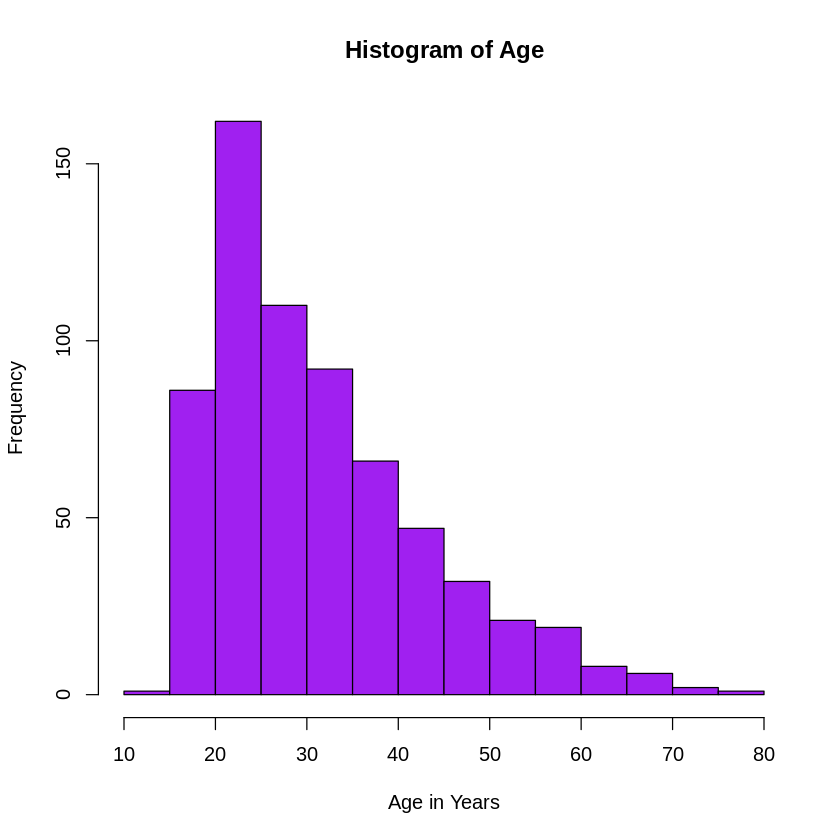

In [0]:
# Histogram
hist(data$Age,
     main = "Histogram of Age",
     xlab = "Age in Years",
     col = "purple")

We observe that most people in the dataset are between the ages of 20 and 25 and the least being over 70

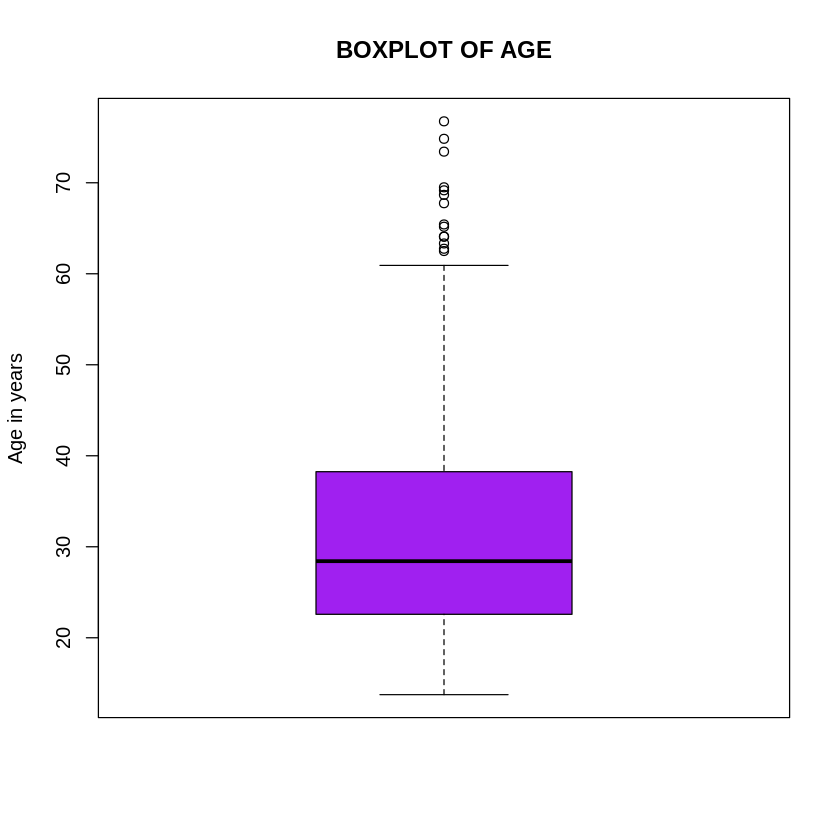

In [0]:
# Boxplot
boxplot(data$Age,
        main = toupper("Boxplot of Age"),
        ylab = "Age in years",
        col = "purple")

We see most outliers being over 65 years old

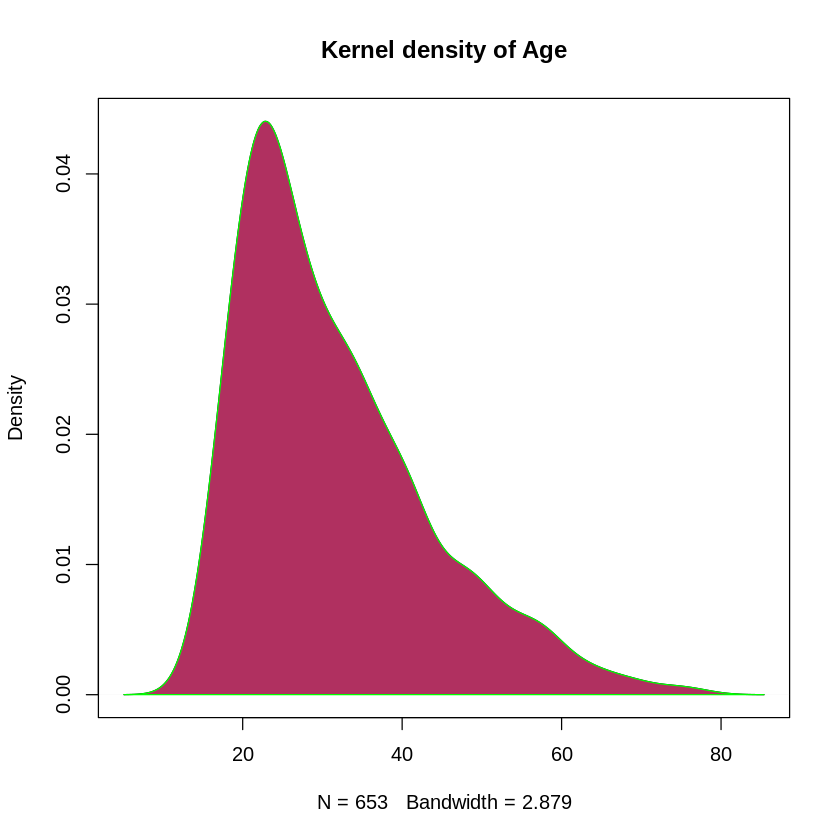

In [0]:
# Kernel Density plot
d <- density(data$Age)
plot(d, main = "Kernel density of Age")
polygon(d, col = "maroon", border = "green")

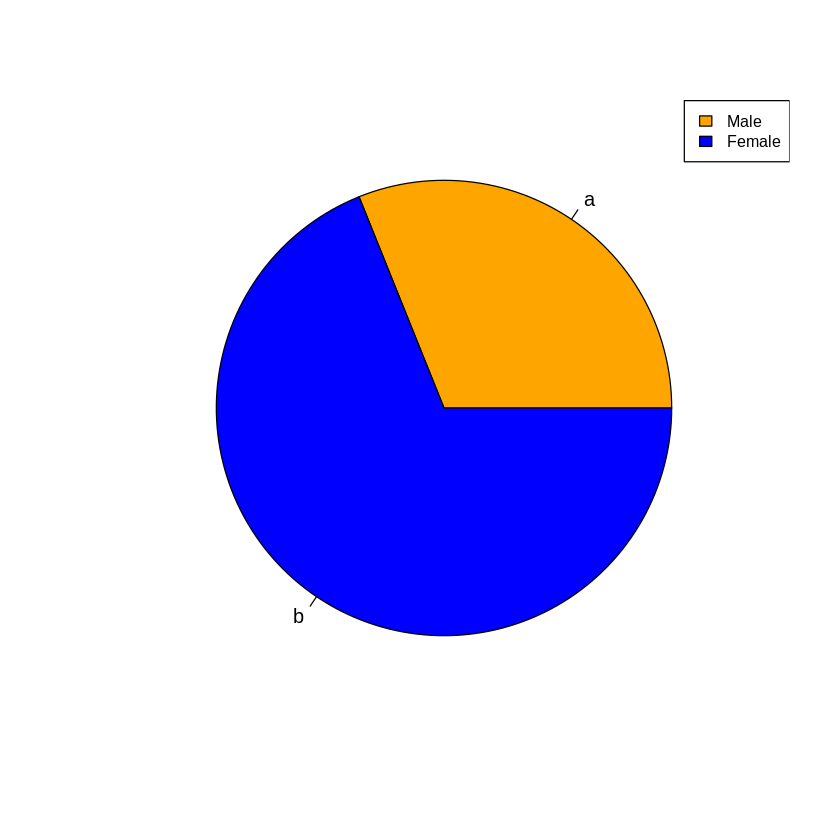

In [0]:
#Pie Chart
library(DataExplorer)

colors = c("orange", "blue")
pie(table(data$Gender), col = colors)
legend("topright", c("Male", "Female"), cex=0.8, fill = colors)

1 columns ignored with more than 50 categories.
ZipCode: 164 categories




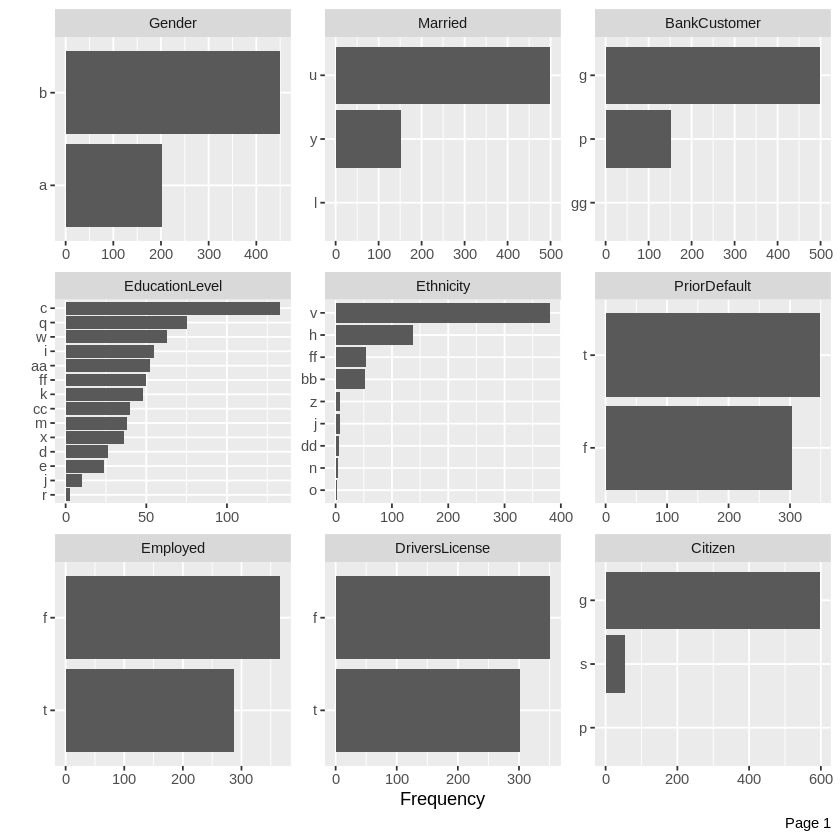

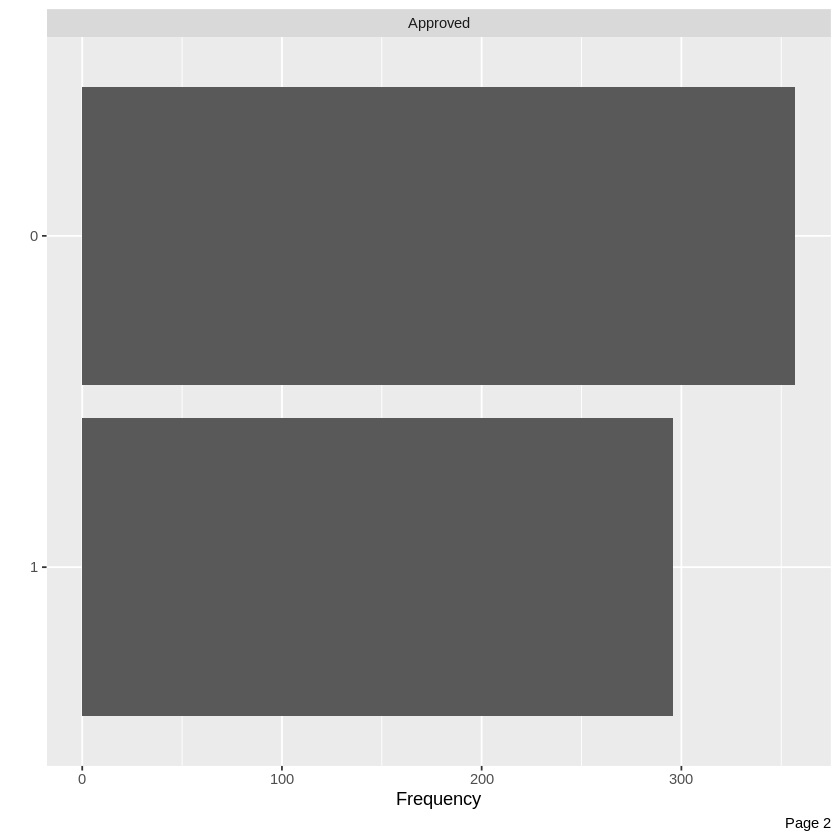

In [0]:
# Plot categorical variables
plot_bar(data)

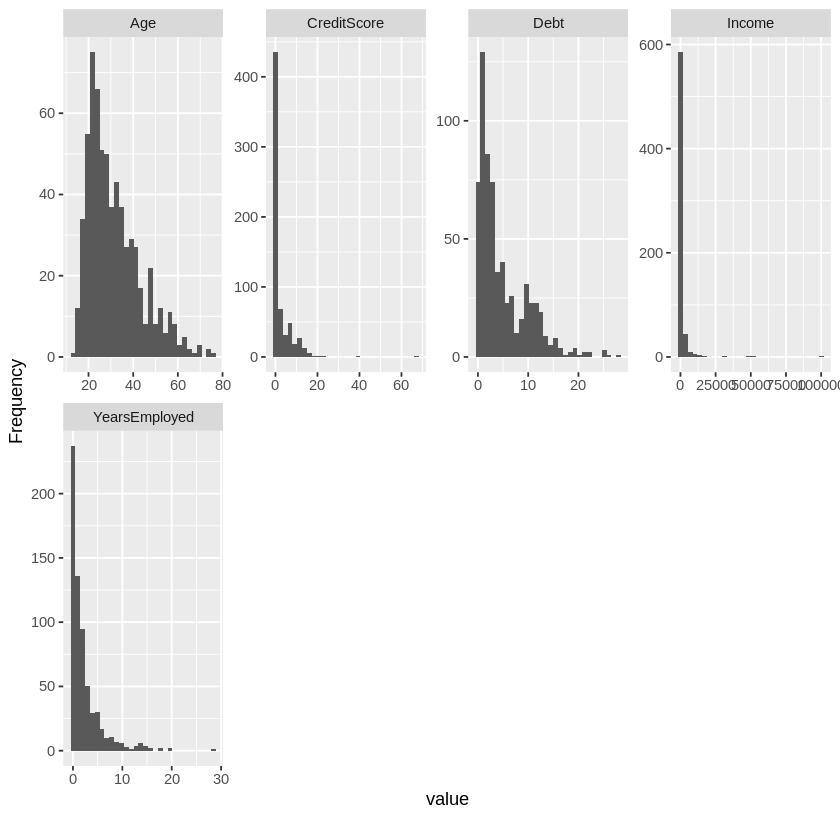

In [0]:
# Plot numerical variables
plot_histogram(data)

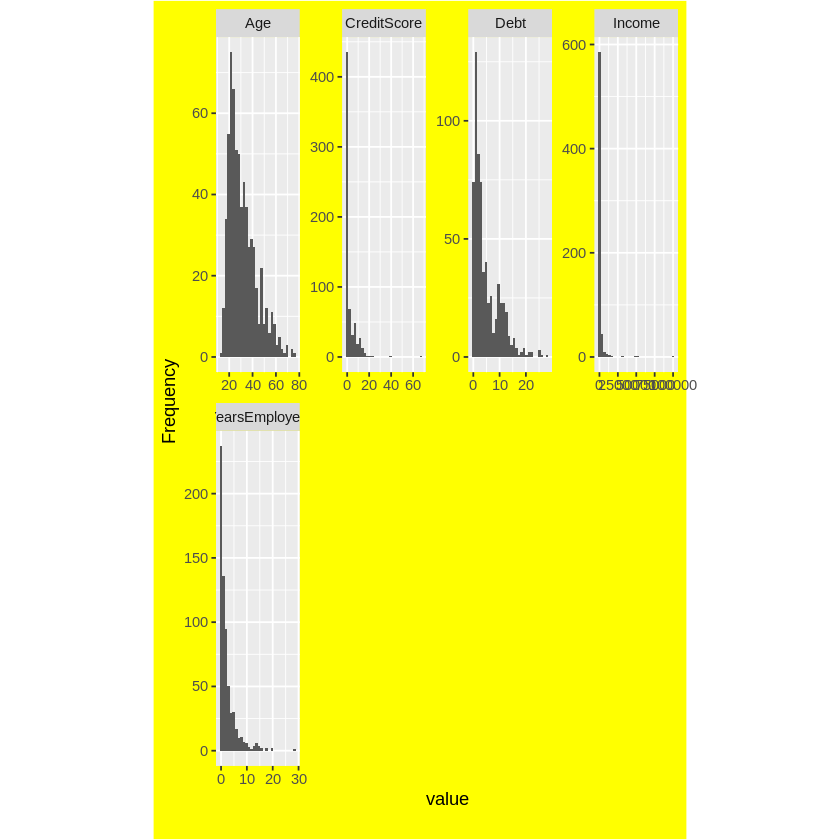

In [0]:
plot_histogram(data, theme_config = list(
  "plot.background" = element_rect(fill = "yellow"),
  "aspect.ratio" = 4
  ))

##### **Bivariate Analysis**

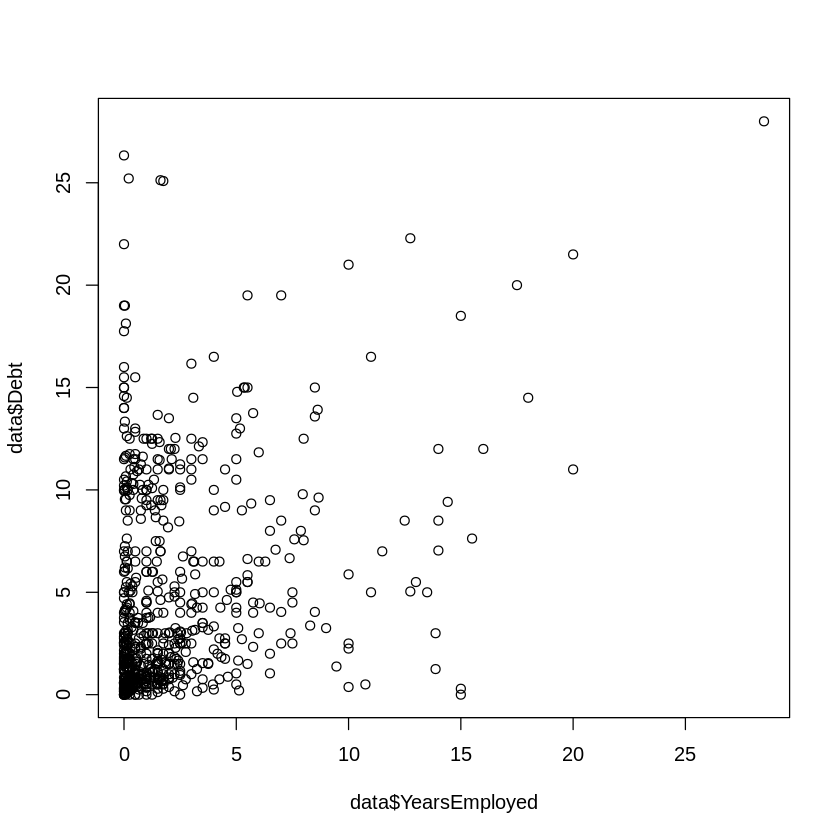

In [0]:
# Plot Years Employed vs Debt
plot(data$YearsEmployed, data$Debt)

We can see that most people who've been employed for more years, the less the people who have debts.

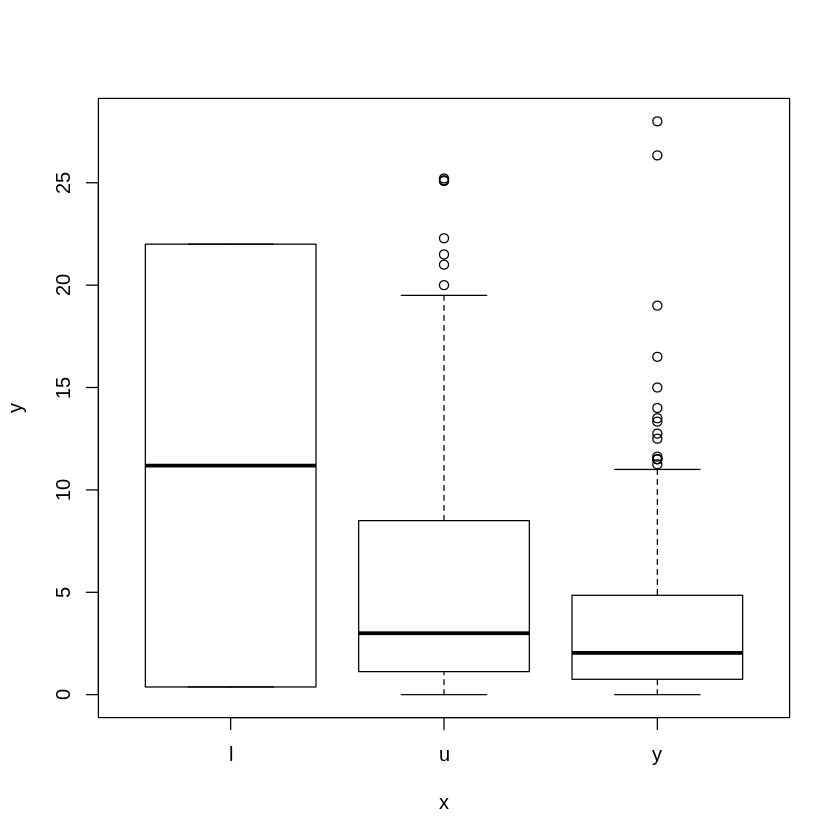

In [0]:
# Plot between married and the debt
plot(data$Married, data$Debt)

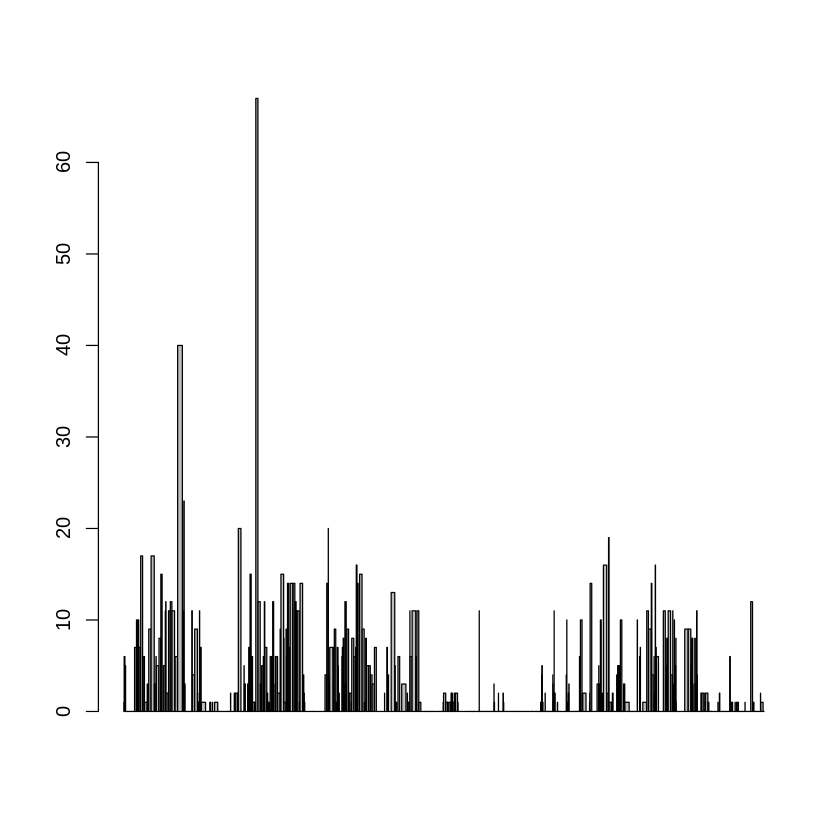

In [0]:
# CreditScore vs Debt
barplot(data$CreditScore, data$Debt)

##### **Multivariate Analysis**

In [0]:
install.packages("tidyverse")
# library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
install.packages("scatterplot3d")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



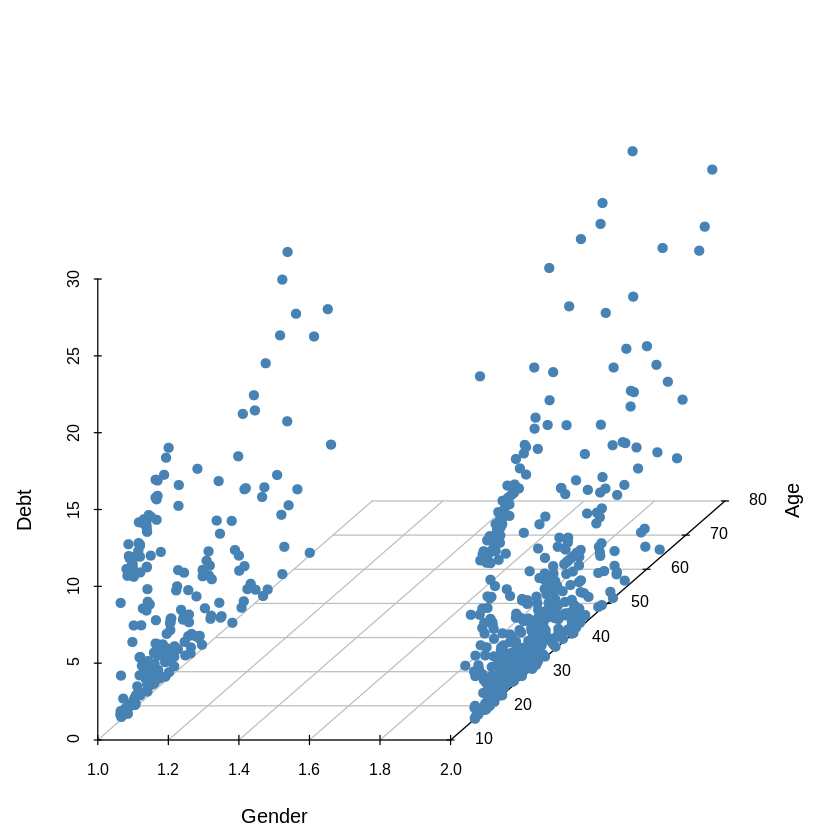

In [0]:
library(scatterplot3d)
scatterplot3d(
  data[,1:3], pch = 19, color = "steelblue",
   grid = TRUE, box = FALSE,
   mar = c(3, 3, 0.5, 3)        
  )

In [0]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



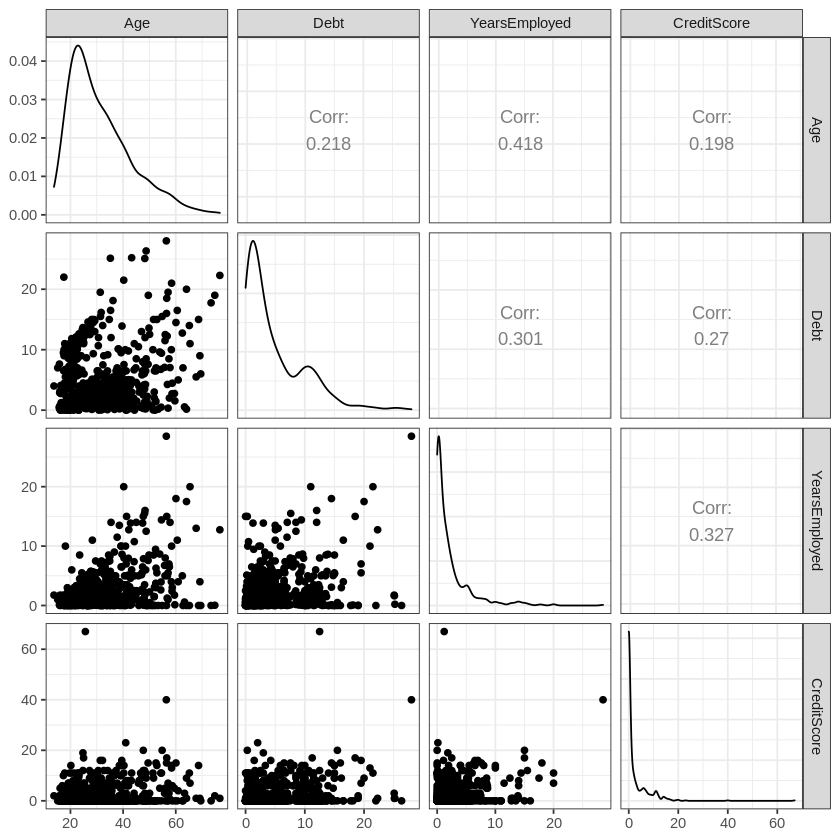

In [0]:
library(GGally)
library(ggplot2)
ggpairs(data[,c(2,3,8,11)])+ theme_bw()

In [0]:
install.packages("PerformanceAnalytics")
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



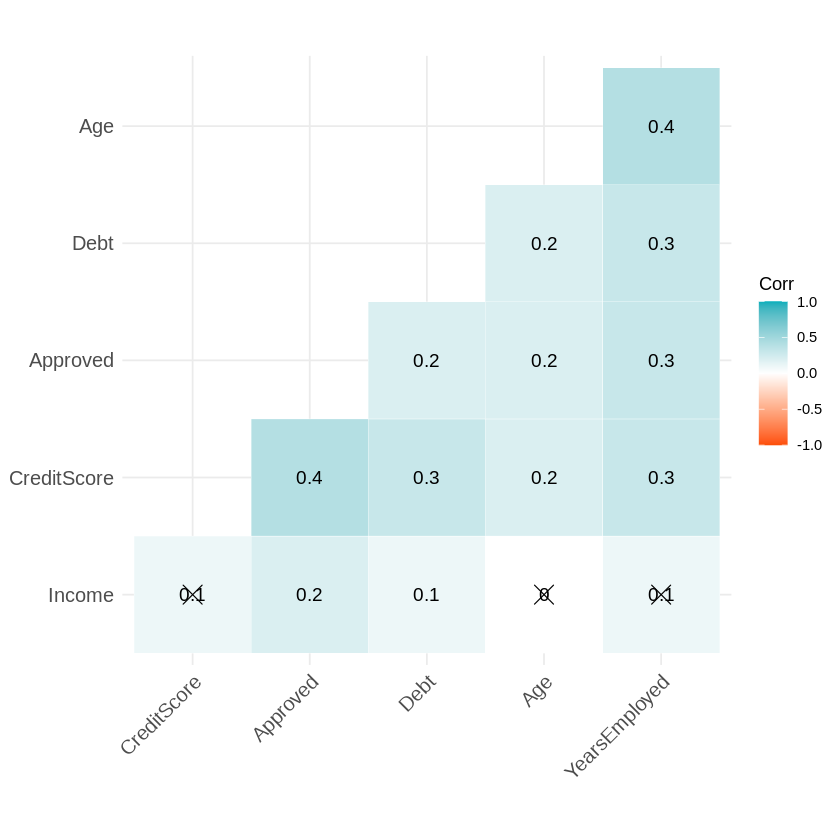

In [0]:
library("ggcorrplot")
# Compute a correlation matrix
data2 <- data[, c(2,3,8,11,15,16)]
corr <- round(cor(data2), 1)
# Visualize
ggcorrplot(corr, p.mat = cor_pmat(data2),
           hc.order = TRUE, type = "lower",
           color = c("#FC4E07", "white", "#00AFBB"),
           outline.col = "white", lab = TRUE)

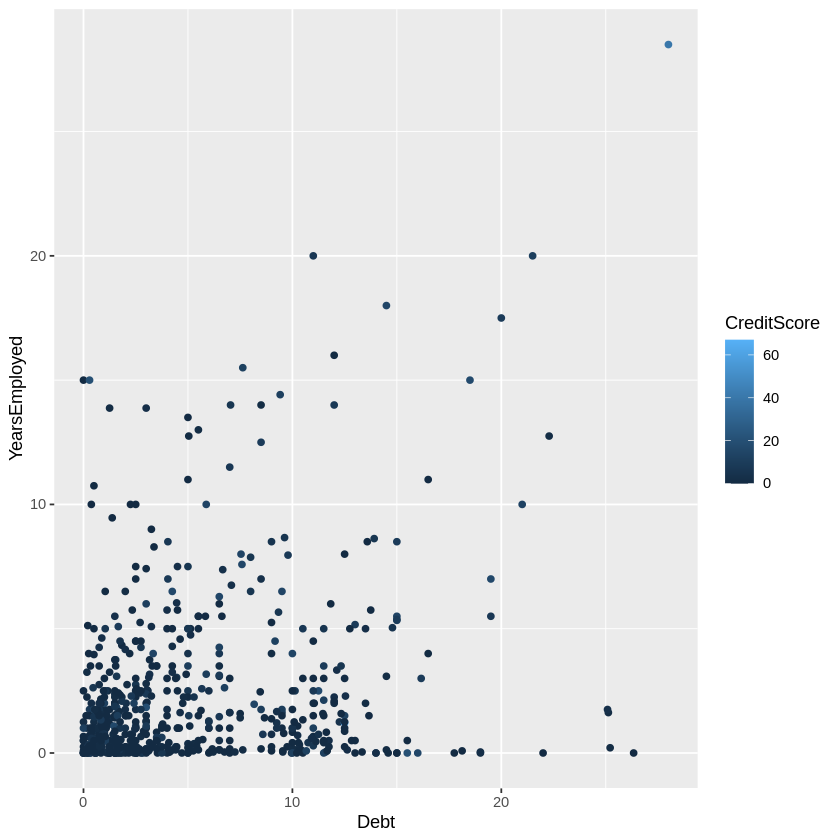

In [0]:
ggplot(data=data, aes(x=Debt, y=YearsEmployed, col=CreditScore)) + geom_point()

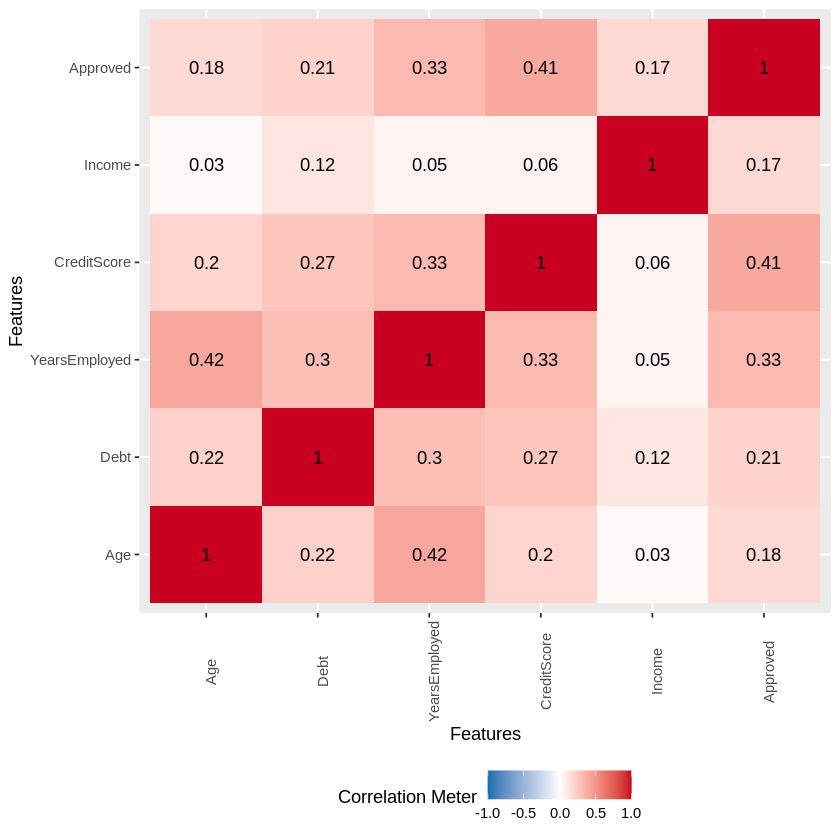

In [0]:
plot_correlation(data, type = 'continuous','Review.Date')

#### **Modeling**

##### **Baseline Model: Logistic Regression**
Regression models generally deal with continuous values but
in our case the target values in Approved are binary. 

Logistic Regression
works well with categorical values. As it deals with probabilities,
the predicted values are based on likelihood of events using logit
function.

In [0]:
str(data)

'data.frame':	653 obs. of  16 variables:
 $ Gender        : Factor w/ 2 levels "a","b": 2 1 1 2 2 2 2 1 2 2 ...
 $ Age           : num  30.8 58.7 24.5 27.8 20.2 ...
 $ Debt          : num  0 4.46 0.5 1.54 5.62 ...
 $ Married       : Factor w/ 3 levels "l","u","y": 2 2 2 2 2 2 2 2 3 3 ...
 $ BankCustomer  : Factor w/ 3 levels "g","gg","p": 1 1 1 1 1 1 1 1 3 3 ...
 $ EducationLevel: Factor w/ 14 levels "aa","c","cc",..: 13 11 11 13 13 10 12 3 9 13 ...
 $ Ethnicity     : Factor w/ 9 levels "bb","dd","ff",..: 8 4 4 8 8 8 4 8 4 8 ...
 $ YearsEmployed : num  1.25 3.04 1.5 3.75 1.71 ...
 $ PriorDefault  : Factor w/ 2 levels "f","t": 2 2 2 2 2 2 2 2 2 2 ...
 $ Employed      : Factor w/ 2 levels "f","t": 2 2 1 2 1 1 1 1 1 1 ...
 $ CreditScore   : int  1 6 0 5 0 0 0 0 0 0 ...
 $ DriversLicense: Factor w/ 2 levels "f","t": 1 1 1 2 1 2 2 1 1 2 ...
 $ Citizen       : Factor w/ 3 levels "g","p","s": 1 1 1 1 3 1 1 1 1 1 ...
 $ ZipCode       : chr  "202" "43" "280" "100" ...
 $ Income        : int  0 

In [0]:
# Drop zipcode and Age column since they do not impact the model as much
data <- subset( data, select = -c(ZipCode, Age ))
names(data)

[1] "Gender"         "Debt"           "Married"        "BankCustomer"  
 [5] "EducationLevel" "Ethnicity"      "YearsEmployed"  "PriorDefault"  
 [9] "Employed"       "CreditScore"    "DriversLicense" "Citizen"       
[13] "Income"         "Approved"

In [0]:
# Encoding categorical variables
# Change gender to be 1 and 0, 1 representing male
data$Gender <- ifelse(data$Gender == "a", 1, 0)

In [0]:
#encoding
#encoding
data$Married <- match(data$Married, unique(data$Married))
data$EducationLevel <- match(data$EducationLevel, unique(data$EducationLevel))
data$BankCustomer <- match(data$BankCustomer, unique(data$BankCustomer))
data$Ethnicity <- match(data$Ethnicity, unique(data$Ethnicity))
data$PriorDefault <- match(data$PriorDefault, unique(data$PriorDefault))
data$Employed <- match(data$Employed, unique(data$Employed))
data$DriversLicense <- match(data$DriversLicense, unique(data$DriversLicense))
data$Citizen <- match(data$Citizen, unique(data$Citizen))

In [0]:
head(data)

,Gender,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,0.000,1,1,1,1,1.25,1,1,1,1,1,0,1
2,1,4.460,1,1,1,2,3.04,1,1,6,1,1,560,1
3,1,0.500,1,1,1,2,1.50,1,2,0,1,1,824,1
4,0,1.540,1,1,2,1,3.75,1,1,5,2,1,3,1
5,0,5.625,1,1,1,1,1.71,1,2,0,1,2,0,1
6,0,4.000,1,1,2,1,2.50,1,2,0,2,1,0,1


In [0]:
# Split our dataset for training and test. Training: 80% and testing 20%
set.seed(123)
sample <- sample(c(TRUE, FALSE), nrow(data), replace = T, prob = c(0.8,0.2))
train <- data[sample, ]
test <- data[!sample, ]

In [0]:
# The glm function fits generalized linear models, a class of models that includes logistic regression. 
# The syntax of the glm function is similar to that of lm, except that 
# we must pass the argument family = binomial in order to tell R to run a logistic regression

# Independent variables = Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, 
# PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income

# Target Variable = ApprovalStatus

# model1 <- glm(Approved ~., family = "binomial", data = train)
# tidy(model1)

model <- glm(Approved ~.,family="binomial", data = train)
summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Approved ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3504  -0.2998  -0.2000   0.5278   3.0009  

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     6.3885425  1.2012051   5.318 1.05e-07 ***
Gender          0.3287907  0.3208949   1.025   0.3055    
Debt           -0.0016572  0.0281003  -0.059   0.9530    
Married        -0.3372557  0.3377731  -0.998   0.3181    
BankCustomer           NA         NA      NA       NA    
EducationLevel -0.3161085  0.2962986  -1.067   0.2860    
Ethnicity      -0.1256486  0.1166147  -1.077   0.2813    
YearsEmployed   0.1324731  0.0538279   2.461   0.0139 *  
PriorDefault   -3.7926188  0.3736081 -10.151  < 2e-16 ***
Employed       -0.6914424  0.3839353  -1.801   0.0717 .  
CreditScore     0.0875420  0.0625356   1.400   0.1616    
DriversLicense         NA         NA      NA       NA    
Citize

In [0]:
# Check predictions on test data
probabilities <- predict(model, newdata = test[,-16], type='response')
predictions <- ifelse(probabilities > 0.5,'1','0')

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [0]:
# summarize the accuracy of the predictions
table(predictions, test$Approved)

           
predictions  0  1
          0 63  8
          1  9 54

The correct predictions are on the diagonal and the wrong ones are on the “off-diagonal”
- It can be seen that we predicted *51 to be “1” (TRUE or they should be approved) and they were indeed “1”(TRUE, correct that we should approve them). That is our TRUE-POSITIVE (TP).
- We also predicted 65 to be “0” (FALSE, that they should be rejected) and they were indeed “0” (FALSE, in the test dataset, they were actually rejected) which indicate our TRUE-NEGATIVE (TN)
-and we predicted 11 to be “1”(TRUE, that they should be accepted) but that prediction was FALSE (WRONG, in the Test Dataset, they were not accepted) . That is our FALSE-POSITIVE (FP)
-and we predicted 7 to be “0” (FALSE, they should be rejected) but that was WRONG as they were “1” (TRUE, they were accepted in the Test Dataset). That is the FALSE-NEGATIVE (FN)

In [0]:
# Lets check the overall Accuracy of our model

misClasificError <- mean(predictions != test$Approved)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.873134328358209"


**Our Accuracy is 87.31%**

Though we get 87.31% overall Accuracy, it is always better to check our recall (TRUE-POSITIVE rate or sensitivity). Recall = TP / (TP + FN) and also your precision which is Precision = TP/ (TP + FP)

And it is also good to have a peep at your TRUE NEGATIVE RATE (which is Specificity) and that is TRUE NEGATIVE RATE = TN / (TN + FP)

In [0]:
# Let’s match predictions to original dataset

copy_test <- data.frame(test)
dim(copy_test)

[1] 134  14

In [0]:
copy_test_pred <- cbind(copy_test, predictions)
head(copy_test_pred)

,Gender,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved,predictions
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
4,0,1.540,1,1,2,1,3.750,1,1,5,2,1,3,1,1
5,0,5.625,1,1,1,1,1.710,1,2,0,1,2,0,1,1
8,1,11.585,1,1,1,1,0.040,1,2,0,1,1,1349,1,1
11,0,0.830,1,1,2,2,2.165,2,2,0,2,1,0,1,0
16,0,4.415,2,2,2,1,0.250,1,1,10,2,1,0,1,1
20,1,8.585,1,1,1,2,0.750,1,1,7,1,1,0,1,1


In [0]:
# Save the predictions
write.csv(copy_test_pred, file = "approved_pred.csv")


In [0]:
# Lets check the Area Under the Curve (AUC) and ROC plot

install.packages("ROCR")
library(ROCR)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


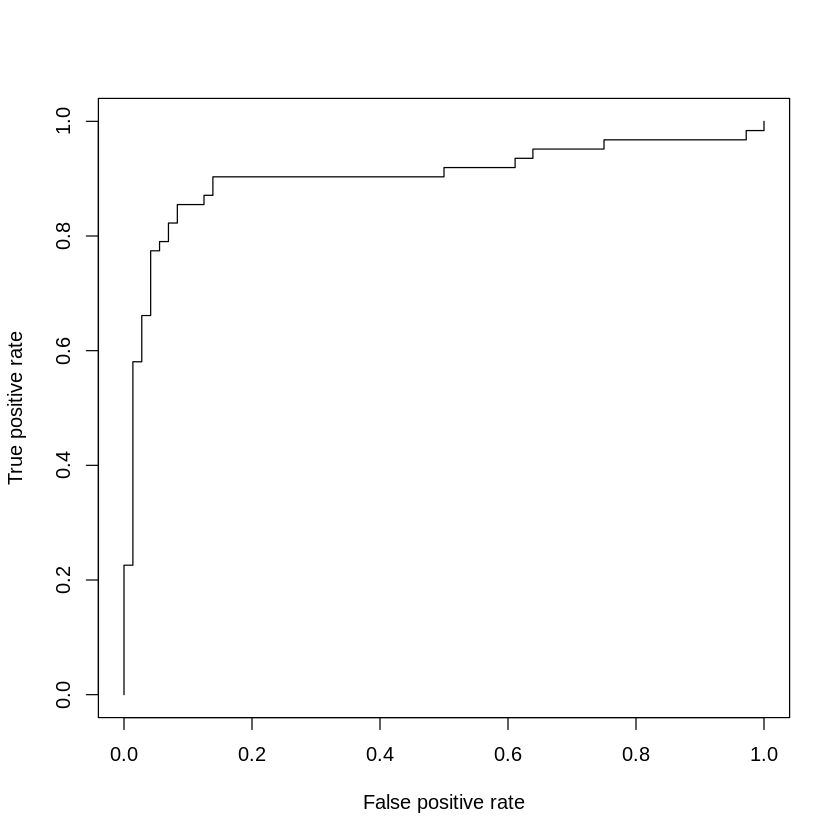

In [0]:
predicted <- predict(model, newdata=test[,-16], type="response")

pr <- prediction(predicted, test$Approved)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

The ROC Curve shows the plot high above and also closer to “1” which is good

In [0]:
#Lets check the area under the curve accuracy

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.9036738

**AUC Accuracy is 90.37%**

#### **Challenging the Solution**

##### **1. Decision Trees**

In [0]:
# Install required packages
install.packages("rpart")
install.packages("rpart.plot")

library(rpart)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
# penalty matrix
penalty.matrix <- matrix(c(0,1,10,0), byrow=TRUE, nrow=2)

In [0]:
# building the classification tree with rpart
tree <- rpart(Approved~.,
data=train,
parms = list(loss = penalty.matrix),
method = "class")

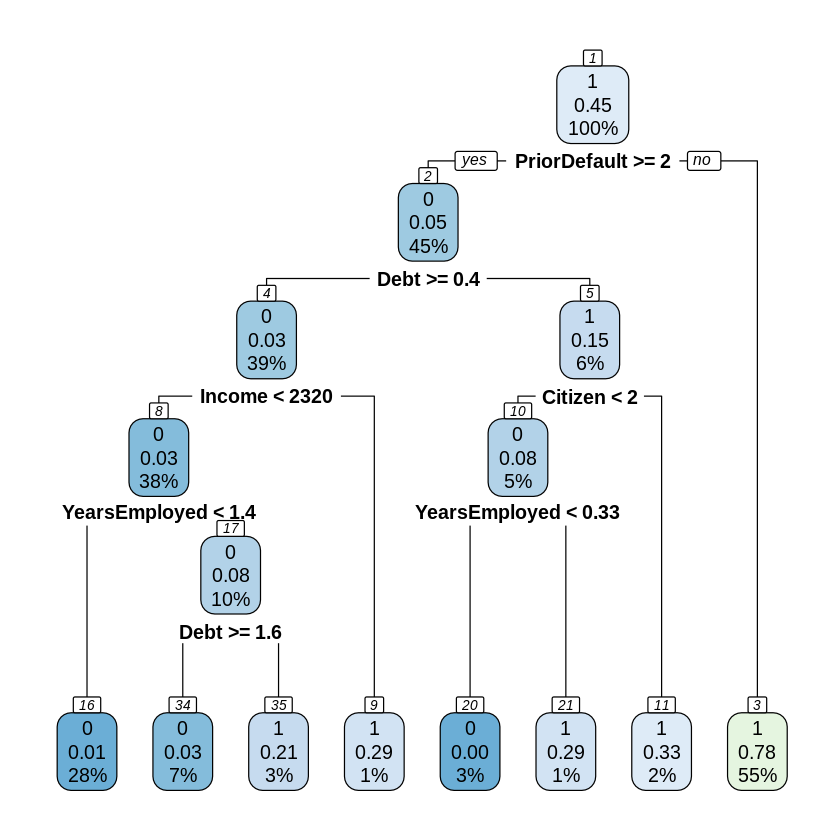

In [0]:
# Visualize the decision tree with rpart.plot
rpart.plot(tree, nn=TRUE)

In [0]:
#Testing the model
# predict_unseen <-predict(fit, data_test, type = 'class')

pred <- predict(object=tree, test,type="class")

In [0]:
#Calculating accuracy
install.packages('caret')
library(caret)

# t <- table(test$Approved,pred) > confusionMatrix(t)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
confusionMatrix(table(test$Approved, pred))

Confusion Matrix and Statistics

   pred
     0  1
  0 52 20
  1  4 58
                                          
               Accuracy : 0.8209          
                 95% CI : (0.7453, 0.8817)
    No Information Rate : 0.5821          
    P-Value [Acc > NIR] : 3.255e-09       
                                          
                  Kappa : 0.6461          
                                          
 Mcnemar's Test P-Value : 0.0022          
                                          
            Sensitivity : 0.9286          
            Specificity : 0.7436          
         Pos Pred Value : 0.7222          
         Neg Pred Value : 0.9355          
             Prevalence : 0.4179          
         Detection Rate : 0.3881          
   Detection Prevalence : 0.5373          
      Balanced Accuracy : 0.8361          
                                          
       'Positive' Class : 0               
                                          

The output shows that we’ve attained an accuracy of 82.09% on the test data set with a 95% confidence interval (0.7453, 0.8817)

##### **2. Random Forest**

In [0]:
# LOADING THE LIBRARIES
install.packages("randomForest")
install.packages("caTools")

library(randomForest)
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
# Change the target variable to a factor
data$Approved=as.factor(data$Approved)

In [0]:
# SEPARATING TRAINING AND TESTING SETS
sample = sample.split(data$Approved, SplitRatio = .75)
train = subset(data, sample == TRUE)
test  = subset(data, sample == FALSE)
dim(train)
dim(test)

[1] 490  14

[1] 163  14

In [0]:
# Training the model
model_rf <- randomForest(
  Approved ~ .,
  data=train
)

In [0]:
# Vieiwing the model
model_rf


Call:
 randomForest(formula = Approved ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 13.88%
Confusion matrix:
    0   1 class.error
0 233  35   0.1305970
1  33 189   0.1486486

In [0]:
# Prediction
predict(model_rf, newdata= test)

1   6   8  11  14  19  31  33  35  42  44  47  51  52  54  56  57  61  81  90 
  1   0   1   0   0   1   1   1   1   1   1   1   0   0   1   0   1   1   1   0 
 95  96  97  99 106 107 111 116 126 129 131 133 136 137 148 149 150 153 154 155 
  0   1   0   0   1   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
160 163 166 167 171 172 182 183 201 204 211 214 222 223 232 233 235 240 242 246 
  1   1   1   1   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
256 259 261 266 274 277 278 282 283 284 286 292 293 294 296 297 298 300 302 305 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
311 312 315 320 342 345 350 354 358 363 365 369 378 381 383 385 387 388 390 396 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
397 401 409 410 415 418 422 426 430 434 437 439 444 452 456 460 466 482 484 486 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
492 493 506 507 509 517 518 527 535 537 544 547 554 558 559 563 564 568 570 572 
  1   1   1   1   1   1   1   0   1   0   0   1   1   1   1   1   0   1   1   1 
574 575 576 586 588 589 594 596 605 613 616 626 630 633 637 652 655 657 670 675 
  1   1   1   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
677 681 683 
  0   0   0 
Levels: 0 1

In [0]:
# Model Perfomance
prediction <-predict(model_rf, test)
confusionMatrix(prediction, test$Approved)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 82 12
         1  7 62
                                         
               Accuracy : 0.8834         
                 95% CI : (0.824, 0.9283)
    No Information Rate : 0.546          
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.7635         
                                         
 Mcnemar's Test P-Value : 0.3588         
                                         
            Sensitivity : 0.9213         
            Specificity : 0.8378         
         Pos Pred Value : 0.8723         
         Neg Pred Value : 0.8986         
             Prevalence : 0.5460         
         Detection Rate : 0.5031         
   Detection Prevalence : 0.5767         
      Balanced Accuracy : 0.8796         
                                         
       'Positive' Class : 0              
                                         

We get an accuracy of 88.34% with a 95% Confidence Interval (0.824, 0.9283)

#### **Conclusion**

Our Baseline model still performed better than the models we used to challenge the solutions.

##### **Recommendations:**
Check on ensemble methods and see if we can get better accuracies